In [1]:
import numpy as np
import pandas as pd


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:

import cv2
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

def get_pixel(img, center, x, y):
    new_value = 0
    try:
        if img[x][y] >= center:
            new_value = 1
    except:
        pass
    return new_value

# Function for calculating LBP
def lbp_calculated_pixel(img, x, y):
   
    center = img[x][y]
    val_ar = []
    val_ar.append(get_pixel(img, center, x+1, y-1))     # top_right
    val_ar.append(get_pixel(img, center, x+1, y))       # right
    val_ar.append(get_pixel(img, center, x+1, y+1))     # bottom_right
    val_ar.append(get_pixel(img, center, x, y+1))       # bottom
    val_ar.append(get_pixel(img, center, x-1, y+1))     # bottom_left
    val_ar.append(get_pixel(img, center, x-1, y))       # left
    val_ar.append(get_pixel(img, center, x-1, y-1))     # top_left
    val_ar.append(get_pixel(img, center, x, y-1))       # top
    
    # Now, we need to convert binary
    # values to decimal
    power_val = [1, 2, 4, 8, 16, 32, 64, 128]
    val = 0
    for i in range(len(val_ar)):
        val += val_ar[i] * power_val[i]
    return val 

def show_output(img_bgr,img_lbp,hist_lbp):
  plt.subplot(1,2,1)
  
  plt.imshow(img_bgr,cmap='gray')
  plt.axis('off')
  plt.title('Gray Image') 
  plt.subplot(1,2,2)
  plt.imshow(img_lbp)
  plt.axis('off') 
  plt.title('LBP Image')
  plt.show()

    

col = []
outcome = []
    
main_path = "/content/drive/MyDrive/NEW/"
print("folders inside tb dataset: "+str(os.listdir(main_path)))
for folder in os.listdir(main_path):
  fol = main_path+folder
  print("folders inside tb dataset:"+folder+"/:"+str(os.listdir(fol)))
  for sub_folder in os.listdir(fol):
    paths = fol+"/"+sub_folder
    for files in os.listdir(paths):
      img = paths+"/"+files
        
      

      img_bgr = cv2.imread(img)
      height, width, channel = img_bgr.shape

      # We need to convert RGB image
      # into gray one because gray
      # image has one channel only.
      img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)

      # Create a numpy array as
      # the same height and width
      # of RGB image    

      img_lbp = np.zeros((height, width,3), np.uint8)
      for i in range(0, height):
          for j in range(0, width):
              img_lbp[i, j] = lbp_calculated_pixel(img_gray, i, j)
      hist_lbp = cv2.calcHist([img_lbp], [0], None, [15], [0, 255])
      hist= [i for x in hist_lbp for i in x]
      outcome.append(img.split(os.path.sep)[-2])
      col.append(hist)
      
  



folders inside tb dataset: ['tb_train', 'tb_test']
folders inside tb dataset:tb_train/:['normal', 'tuberculosis']
folders inside tb dataset:tb_test/:['tuberculosis', 'normal']


In [4]:
df= pd.DataFrame(col)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,34198.0,19704.0,6410.0,23088.0,2864.0,4324.0,4661.0,28248.0,9705.0,8395.0,3801.0,20759.0,7236.0,23414.0,32943.0
1,33502.0,18975.0,5339.0,24013.0,2636.0,4108.0,4446.0,27183.0,9831.0,7105.0,3471.0,21155.0,6467.0,29554.0,31356.0
2,23923.0,16998.0,4328.0,25555.0,1377.0,2267.0,3161.0,27433.0,9706.0,6439.0,2513.0,20254.0,5751.0,27931.0,38282.0
3,21594.0,14215.0,3883.0,24862.0,1354.0,1948.0,2602.0,26135.0,10455.0,6757.0,2462.0,21768.0,6319.0,29190.0,36101.0
4,32572.0,18937.0,5431.0,21652.0,2543.0,3815.0,4430.0,28115.0,10640.0,7131.0,3311.0,22311.0,6593.0,25816.0,31942.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4212,29848.0,17109.0,4173.0,21268.0,1817.0,2614.0,4156.0,34246.0,12317.0,6251.0,2772.0,21865.0,6008.0,28236.0,39836.0
4213,28555.0,19089.0,4506.0,25023.0,1914.0,3260.0,3749.0,27026.0,9388.0,5797.0,2654.0,23721.0,5369.0,31886.0,30320.0
4214,24247.0,19763.0,4907.0,26075.0,1641.0,3048.0,3796.0,20967.0,6393.0,5429.0,2069.0,20787.0,4870.0,31214.0,29395.0
4215,33010.0,20067.0,6523.0,21790.0,2910.0,4145.0,4431.0,26045.0,9363.0,8451.0,3828.0,23737.0,7744.0,25010.0,30271.0


In [5]:
df['outcome']= outcome

In [6]:
df


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,outcome
0,34198.0,19704.0,6410.0,23088.0,2864.0,4324.0,4661.0,28248.0,9705.0,8395.0,3801.0,20759.0,7236.0,23414.0,32943.0,normal
1,33502.0,18975.0,5339.0,24013.0,2636.0,4108.0,4446.0,27183.0,9831.0,7105.0,3471.0,21155.0,6467.0,29554.0,31356.0,normal
2,23923.0,16998.0,4328.0,25555.0,1377.0,2267.0,3161.0,27433.0,9706.0,6439.0,2513.0,20254.0,5751.0,27931.0,38282.0,normal
3,21594.0,14215.0,3883.0,24862.0,1354.0,1948.0,2602.0,26135.0,10455.0,6757.0,2462.0,21768.0,6319.0,29190.0,36101.0,normal
4,32572.0,18937.0,5431.0,21652.0,2543.0,3815.0,4430.0,28115.0,10640.0,7131.0,3311.0,22311.0,6593.0,25816.0,31942.0,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4212,29848.0,17109.0,4173.0,21268.0,1817.0,2614.0,4156.0,34246.0,12317.0,6251.0,2772.0,21865.0,6008.0,28236.0,39836.0,normal
4213,28555.0,19089.0,4506.0,25023.0,1914.0,3260.0,3749.0,27026.0,9388.0,5797.0,2654.0,23721.0,5369.0,31886.0,30320.0,normal
4214,24247.0,19763.0,4907.0,26075.0,1641.0,3048.0,3796.0,20967.0,6393.0,5429.0,2069.0,20787.0,4870.0,31214.0,29395.0,normal
4215,33010.0,20067.0,6523.0,21790.0,2910.0,4145.0,4431.0,26045.0,9363.0,8451.0,3828.0,23737.0,7744.0,25010.0,30271.0,normal


In [7]:
from sklearn.preprocessing import StandardScaler
features = df.drop(['outcome'], axis=1)
scaler = StandardScaler()
scaler.fit(features)
s=scaler.transform(features)
print(s)

[[ 1.1721659   0.5754139   1.4046584  ...  1.1541343  -1.1561773
  -0.21728197]
 [ 1.0601219   0.31239906  0.63367575 ...  0.44453418  0.10480858
  -0.57952595]
 [-0.48193157 -0.40087986 -0.09411456 ... -0.21615966 -0.22851063
   1.0013827 ]
 ...
 [-0.42977318  0.5967004   0.32269117 ... -1.0291083   0.4457266
  -1.027138  ]
 [ 0.9809184   0.70638007  1.4860039  ...  1.6228946  -0.82840306
  -0.82718486]
 [-0.09863171  0.9657871  -0.08331649 ... -1.1149247   0.929789
   0.4727392 ]]


In [8]:
df= pd.DataFrame(s)
df['outcome']= outcome
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,outcome
0,1.172166,0.575414,1.404658,-0.449544,1.287912,1.233443,0.752693,0.234416,-0.334505,1.709434,1.118935,-0.175424,1.154134,-1.156177,-0.217282,normal
1,1.060122,0.312399,0.633676,-0.268025,0.993094,1.048783,0.591017,-0.096046,-0.279066,0.578521,0.794030,-0.038223,0.444534,0.104809,-0.579526,normal
2,-0.481932,-0.400880,-0.094115,0.034573,-0.634871,-0.525099,-0.375278,-0.018473,-0.334065,-0.005345,-0.149180,-0.350390,-0.216160,-0.228511,1.001383,normal
3,-0.856860,-1.404954,-0.414457,-0.101419,-0.664612,-0.797814,-0.795635,-0.421234,-0.004513,0.273438,-0.199392,0.174161,0.307966,0.030053,0.503554,normal
4,0.910408,0.298689,0.699904,-0.731341,0.872839,0.798296,0.578985,0.193147,0.076885,0.601315,0.636500,0.362293,0.560802,-0.662873,-0.445767,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4212,0.471891,-0.360832,-0.205695,-0.806696,-0.065924,-0.228447,0.372943,2.095554,0.814745,-0.170160,0.105822,0.207769,0.020989,-0.165872,1.356094,normal
4213,0.263740,0.353529,0.034023,-0.069825,0.059503,0.323823,0.066887,-0.144762,-0.473981,-0.568171,-0.010356,0.850813,-0.568653,0.583737,-0.816000,normal
4214,-0.429773,0.596700,0.322691,0.136616,-0.293503,0.142582,0.102230,-2.024828,-1.791746,-0.890788,-0.586324,-0.165723,-1.029108,0.445727,-1.027138,normal
4215,0.980918,0.706380,1.486004,-0.704261,1.347393,1.080415,0.579737,-0.449160,-0.484981,1.758528,1.145518,0.856356,1.622895,-0.828403,-0.827185,normal


In [9]:
x = df.drop(['outcome'], axis=1)
y = df.outcome

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [11]:
from sklearn.svm import SVC
import pandas as pd
import seaborn as sns
from sklearn.metrics import classification_report
model = SVC(C=1 ,kernel='linear')
model.fit(x_train,y_train)

SVC(C=1, kernel='linear')

In [12]:
y_pred=model.predict(x_test)

In [13]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      normal       0.99      1.00      1.00       692
tuberculosis       1.00      0.97      0.98       152

    accuracy                           0.99       844
   macro avg       1.00      0.98      0.99       844
weighted avg       0.99      0.99      0.99       844



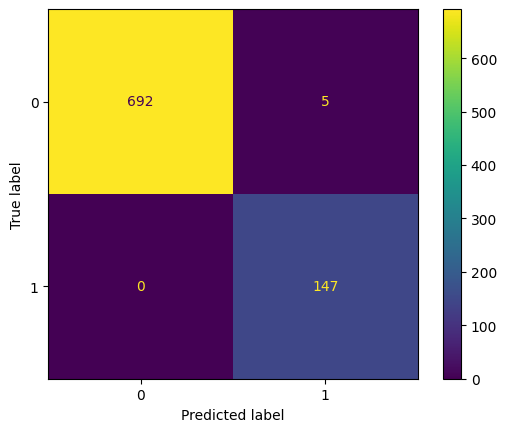

In [14]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report , ConfusionMatrixDisplay
import seaborn as sb
cm=confusion_matrix(y_pred,y_test)
ConfusionMatrixDisplay(cm).plot()


In [43]:
model = SVC(C=4 ,kernel='linear')
model.fit(x_train,y_train)

y_pred=model.predict(x_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      normal       0.99      1.00      1.00       692
tuberculosis       1.00      0.97      0.99       152

    accuracy                           1.00       844
   macro avg       1.00      0.99      0.99       844
weighted avg       1.00      1.00      1.00       844



In [22]:
model = SVC(C=1 ,kernel='sigmoid')
model.fit(x_train,y_train)

y_pred=model.predict(x_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      normal       0.94      0.95      0.95       692
tuberculosis       0.78      0.73      0.75       152

    accuracy                           0.91       844
   macro avg       0.86      0.84      0.85       844
weighted avg       0.91      0.91      0.91       844



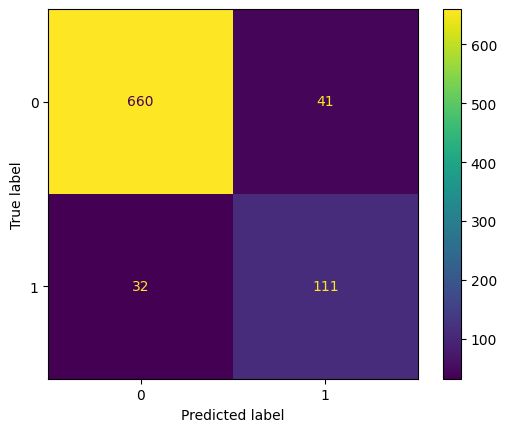

In [23]:
cm=confusion_matrix(y_pred,y_test)
ConfusionMatrixDisplay(cm).plot()

In [40]:
model = SVC(C=3 ,kernel='sigmoid')
model.fit(x_train,y_train)

y_pred=model.predict(x_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      normal       0.94      0.95      0.95       692
tuberculosis       0.77      0.72      0.75       152

    accuracy                           0.91       844
   macro avg       0.86      0.84      0.85       844
weighted avg       0.91      0.91      0.91       844



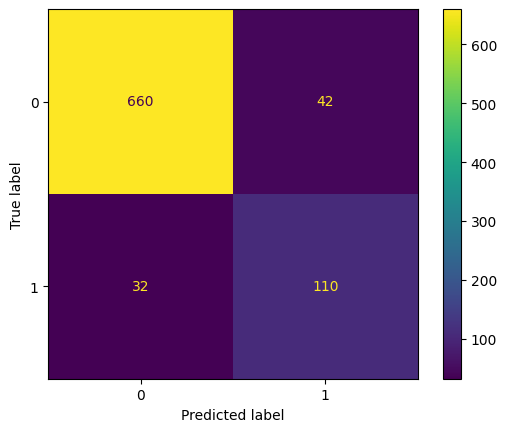

In [39]:
cm=confusion_matrix(y_pred,y_test)
ConfusionMatrixDisplay(cm).plot()

In [48]:
model = SVC(C=1,kernel='rbf')
model.fit(x_train,y_train)

y_pred=model.predict(x_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      normal       0.99      1.00      0.99       692
tuberculosis       1.00      0.95      0.98       152

    accuracy                           0.99       844
   macro avg       0.99      0.98      0.99       844
weighted avg       0.99      0.99      0.99       844



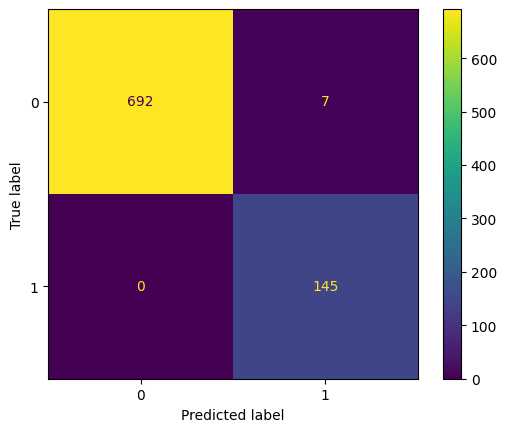

In [49]:
cm=confusion_matrix(y_pred,y_test)
ConfusionMatrixDisplay(cm).plot()

              precision    recall  f1-score   support

      normal       0.99      1.00      1.00       692
tuberculosis       1.00      0.97      0.99       152

    accuracy                           1.00       844
   macro avg       1.00      0.99      0.99       844
weighted avg       1.00      1.00      1.00       844



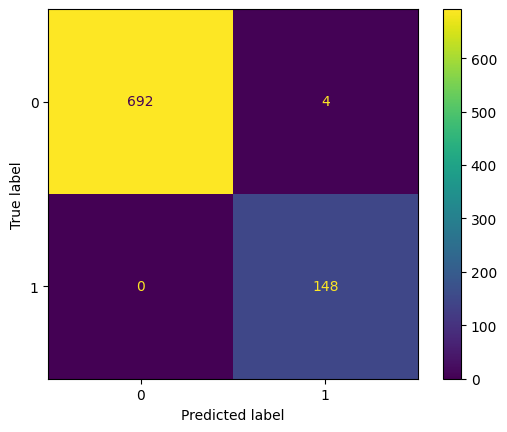

In [51]:
model = SVC(C=2,kernel='rbf')
model.fit(x_train,y_train)

y_pred=model.predict(x_test)

print(classification_report(y_test,y_pred))

cm=confusion_matrix(y_pred,y_test)
ConfusionMatrixDisplay(cm).plot()

              precision    recall  f1-score   support

      normal       1.00      1.00      1.00       692
tuberculosis       1.00      0.98      0.99       152

    accuracy                           1.00       844
   macro avg       1.00      0.99      0.99       844
weighted avg       1.00      1.00      1.00       844



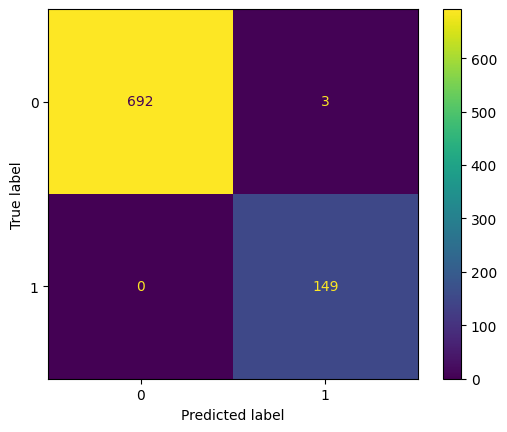

In [56]:
model = SVC(C=1,kernel='poly')
model.fit(x_train,y_train)

y_pred=model.predict(x_test)

print(classification_report(y_test,y_pred))

cm=confusion_matrix(y_pred,y_test)
ConfusionMatrixDisplay(cm).plot()

              precision    recall  f1-score   support

      normal       1.00      1.00      1.00       692
tuberculosis       1.00      0.98      0.99       152

    accuracy                           1.00       844
   macro avg       1.00      0.99      0.99       844
weighted avg       1.00      1.00      1.00       844



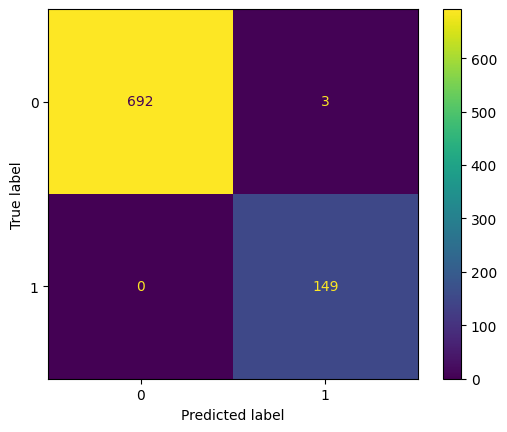

In [57]:
model = SVC(C=2,kernel='poly')
model.fit(x_train,y_train)

y_pred=model.predict(x_test)

print(classification_report(y_test,y_pred))

cm=confusion_matrix(y_pred,y_test)
ConfusionMatrixDisplay(cm).plot()

              precision    recall  f1-score   support

      normal       1.00      0.99      1.00       692
tuberculosis       0.97      0.99      0.98       152

    accuracy                           0.99       844
   macro avg       0.99      0.99      0.99       844
weighted avg       0.99      0.99      0.99       844



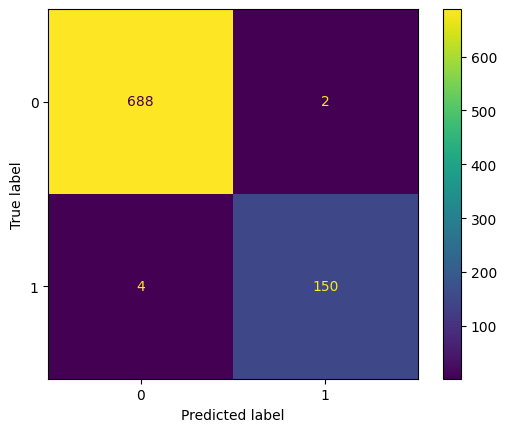

In [15]:
from sklearn.neighbors import KNeighborsClassifier
mymodel=KNeighborsClassifier(n_neighbors=1)
#training the model
mymodel.fit(x_train,y_train)
#testing the model
y_pred=mymodel.predict(x_test)
cm=confusion_matrix(y_pred,y_test)
ConfusionMatrixDisplay(cm).plot()
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      normal       1.00      1.00      1.00       692
tuberculosis       0.99      0.99      0.99       152

    accuracy                           1.00       844
   macro avg       1.00      0.99      0.99       844
weighted avg       1.00      1.00      1.00       844



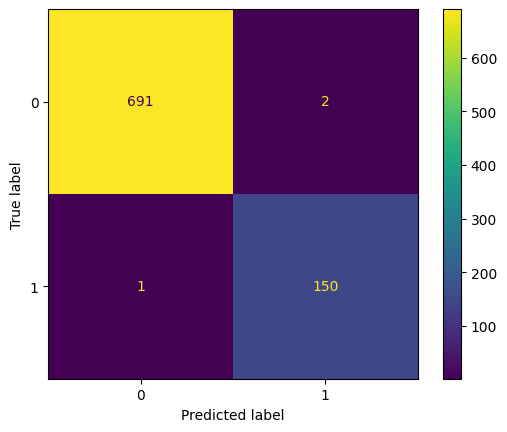

In [62]:
mymodel=KNeighborsClassifier(n_neighbors=3)
#training the model
mymodel.fit(x_train,y_train)
#testing the model
y_pred=mymodel.predict(x_test)
cm=confusion_matrix(y_pred,y_test)
ConfusionMatrixDisplay(cm).plot()
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      normal       0.99      1.00      1.00       692
tuberculosis       0.99      0.97      0.98       152

    accuracy                           0.99       844
   macro avg       0.99      0.99      0.99       844
weighted avg       0.99      0.99      0.99       844



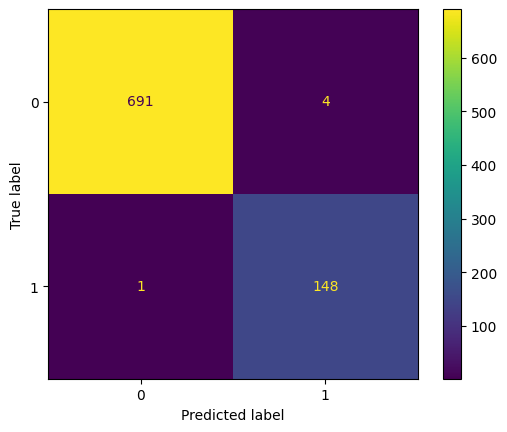

In [63]:
mymodel=KNeighborsClassifier(n_neighbors=5)
#training the model
mymodel.fit(x_train,y_train)
#testing the model
y_pred=mymodel.predict(x_test)
cm=confusion_matrix(y_pred,y_test)
ConfusionMatrixDisplay(cm).plot()
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      normal       0.99      1.00      0.99       692
tuberculosis       0.99      0.97      0.98       152

    accuracy                           0.99       844
   macro avg       0.99      0.98      0.99       844
weighted avg       0.99      0.99      0.99       844



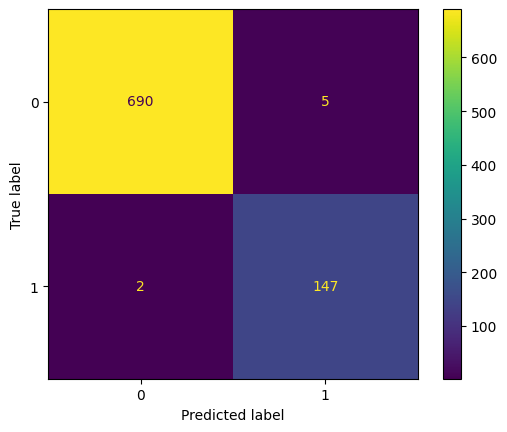

In [68]:
mymodel=KNeighborsClassifier(n_neighbors=9)
#training the model
mymodel.fit(x_train,y_train)
#testing the model
y_pred=mymodel.predict(x_test)
cm=confusion_matrix(y_pred,y_test)
ConfusionMatrixDisplay(cm).plot()
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      normal       1.00      0.99      0.99       693
tuberculosis       0.97      0.98      0.98       151

    accuracy                           0.99       844
   macro avg       0.98      0.99      0.99       844
weighted avg       0.99      0.99      0.99       844



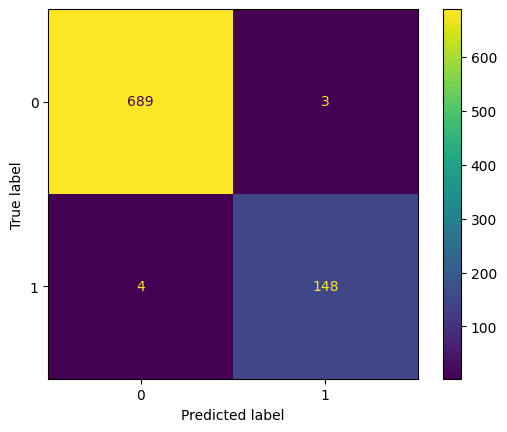

In [16]:

from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

y_pred=dt.predict(x_test)

cm=confusion_matrix(y_test,y_pred)
ConfusionMatrixDisplay(cm).plot()
print(classification_report(y_pred,y_test))
  


In [18]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_Train = sc_X.fit_transform(x_train)
X_Test = sc_X.transform(x_test)

# Fitting the classifier into the Training set

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 200, criterion = 'entropy', random_state = 0)
classifier.fit(X_Train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=200, random_state=0)

              precision    recall  f1-score   support

      normal       1.00      0.99      0.99       693
tuberculosis       0.97      0.98      0.98       151

    accuracy                           0.99       844
   macro avg       0.98      0.99      0.99       844
weighted avg       0.99      0.99      0.99       844



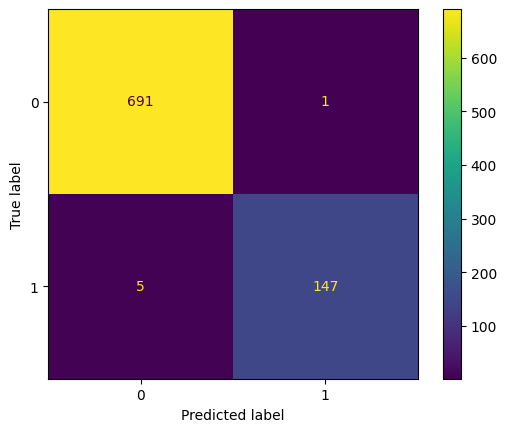

In [21]:
Y_Pred = classifier.predict(x_test)

# Making the Confusion Matrix 

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, Y_Pred)
ConfusionMatrixDisplay(cm).plot()
print(classification_report(y_pred,y_test))